In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Superstore _Sales _data.xlsx')

In [ ]:
df.head()

,Order Date,Sales
0,2016-08-11 00:00:00,261.9600
1,2016-08-11 00:00:00,731.9400
2,2016-12-06 00:00:00,14.6200
3,2015-11-10 00:00:00,957.5775
4,2015-11-10 00:00:00,22.3680


In [ ]:
df.tail()

,Order Date,Sales
9989,1/21/2014,25.248
9990,2/26/2017,91.960
9991,2/26/2017,258.576
9992,2/26/2017,29.600
9993,2017-04-05 00:00:00,243.160


In [ ]:
# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Format the 'Order Date' column to the desired format
df['Order Date'] = df['Order Date'].dt.strftime('%Y/%m/%d')



In [ ]:
df.head()

,Order Date,Sales
0,2016/08/11,261.9600
1,2016/08/11,731.9400
2,2016/12/06,14.6200
3,2015/11/10,957.5775
4,2015/11/10,22.3680


In [ ]:
# Find the earliest and latest dates
first_date = df['Order Date'].min()
last_date = df['Order Date'].max()


In [ ]:
first_date

'2014/01/02'

In [ ]:
last_date

'2017/12/30'

In [ ]:
df.shape

(9994, 2)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y/%m/%d')

# Group by 'Order Date' and calculate the average sales for each date
data = df.groupby('Order Date')['Sales'].mean().reset_index()

# Rename the columns for clarity
data.columns = ['Order Date', 'Average Sales']

In [ ]:
data.head()

,Order Date,Average Sales
0,2014-01-02,468.900000
1,2014-01-03,220.315100
2,2014-01-04,29.972000
3,2014-01-06,471.683636
4,2014-01-07,200.341333


In [ ]:
data.tail()

,Order Date,Average Sales
1232,2017-12-26,203.648500
1233,2017-12-27,88.818000
1234,2017-12-28,87.228989
1235,2017-12-29,242.961167
1236,2017-12-30,101.970000


In [ ]:
data.shape

(1237, 2)

In [ ]:
data.isna().sum()

Order Date       0
Average Sales    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

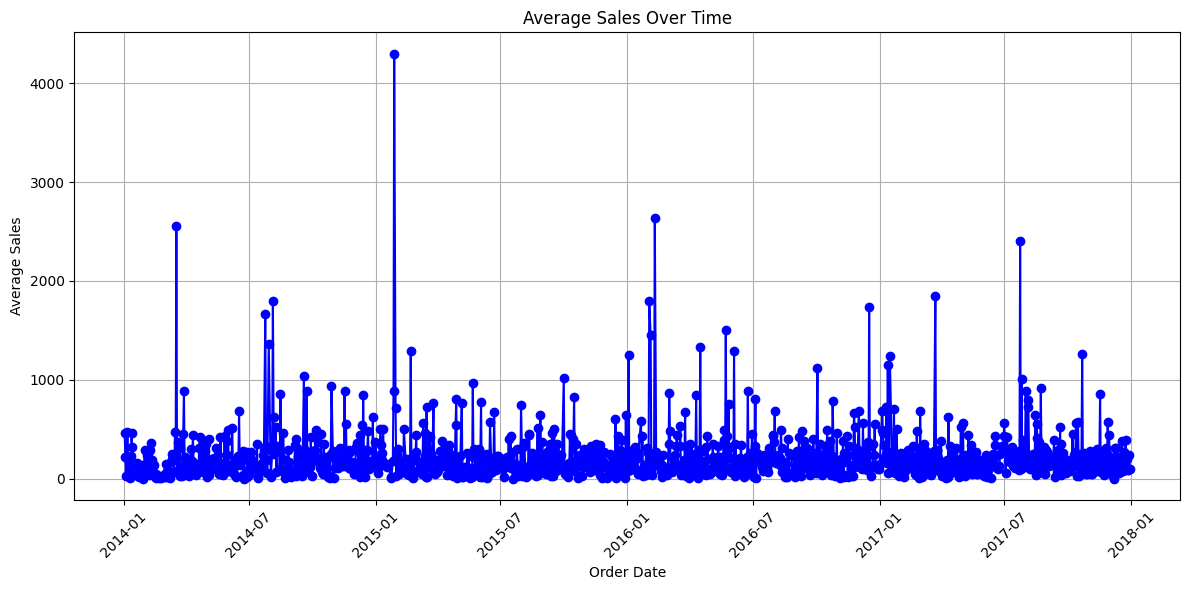

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(data['Order Date'], data['Average Sales'], marker='o', linestyle='-', color='b')  # Plot with markers
plt.title('Average Sales Over Time')  # Set the title
plt.xlabel('Order Date')  # Set x-axis label
plt.ylabel('Average Sales')  # Set y-axis label
plt.grid(True)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

In [ ]:
# Sort data by 'Order Date' to maintain temporal order
data = data.sort_values(by='Order Date')


In [ ]:
# Define the split ratio
train_size = 0.8  # 80% for training, 20% for testing
split_index = int(len(data) * train_size)

# Split the data
train_df = data[:split_index]
test_df = data[split_index:]

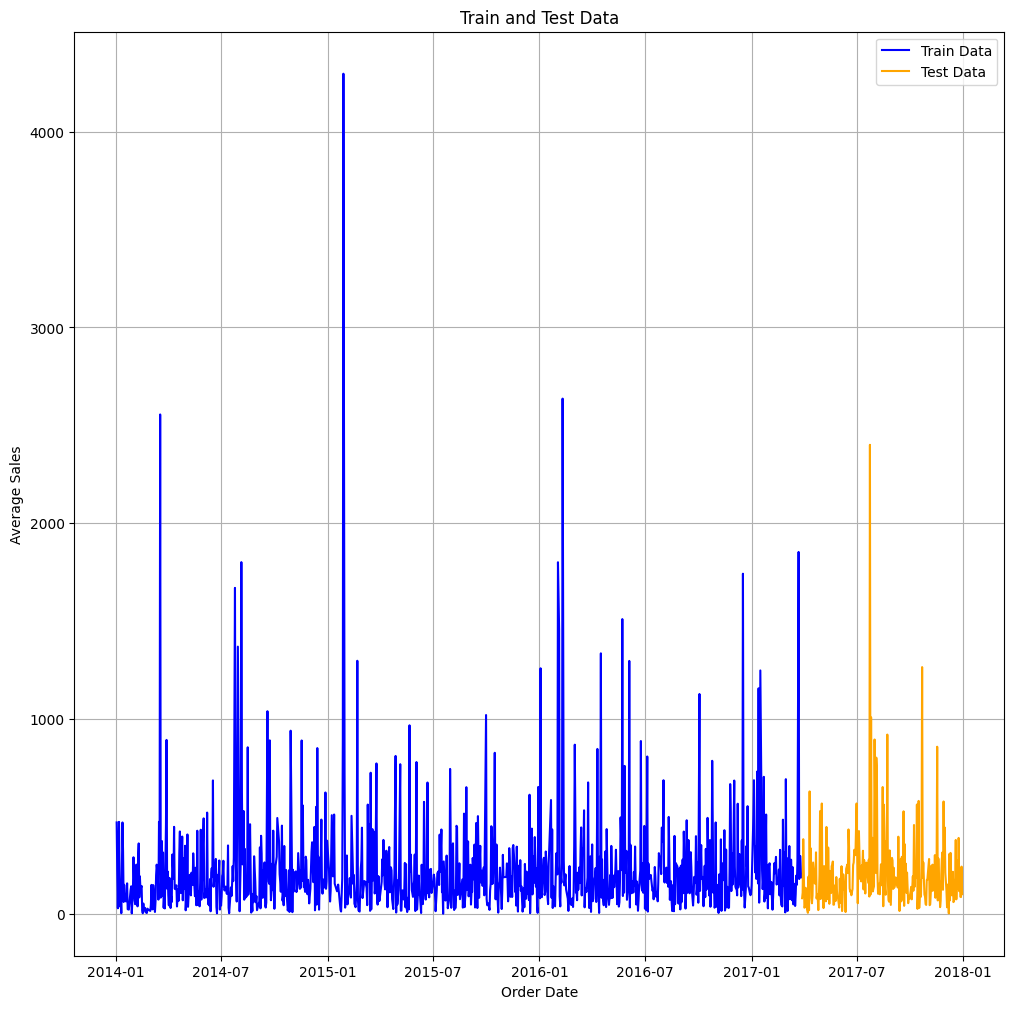

In [ ]:
# Plot the data
plt.figure(figsize=(12, 12))
plt.plot(train_df['Order Date'], train_df['Average Sales'], label='Train Data', color='blue')
plt.plot(test_df['Order Date'], test_df['Average Sales'], label='Test Data', color='orange')
plt.xlabel('Order Date')
plt.ylabel('Average Sales')
plt.title('Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

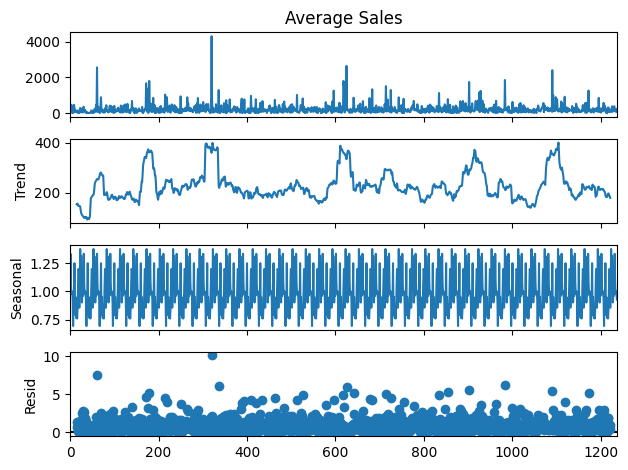

In [ ]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Average Sales'], model='multiplicative', period=30)

# Plot the decomposed components
result.plot()
plt.show()

In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Assuming 'Average Sales' is the column to test
result = adfuller(data['Average Sales'])


In [ ]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -33.32514827444433
p-value: 0.0
Critical Values: {'1%': -3.435651725648415, '5%': -2.863881223119536, '10%': -2.568016498910778}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


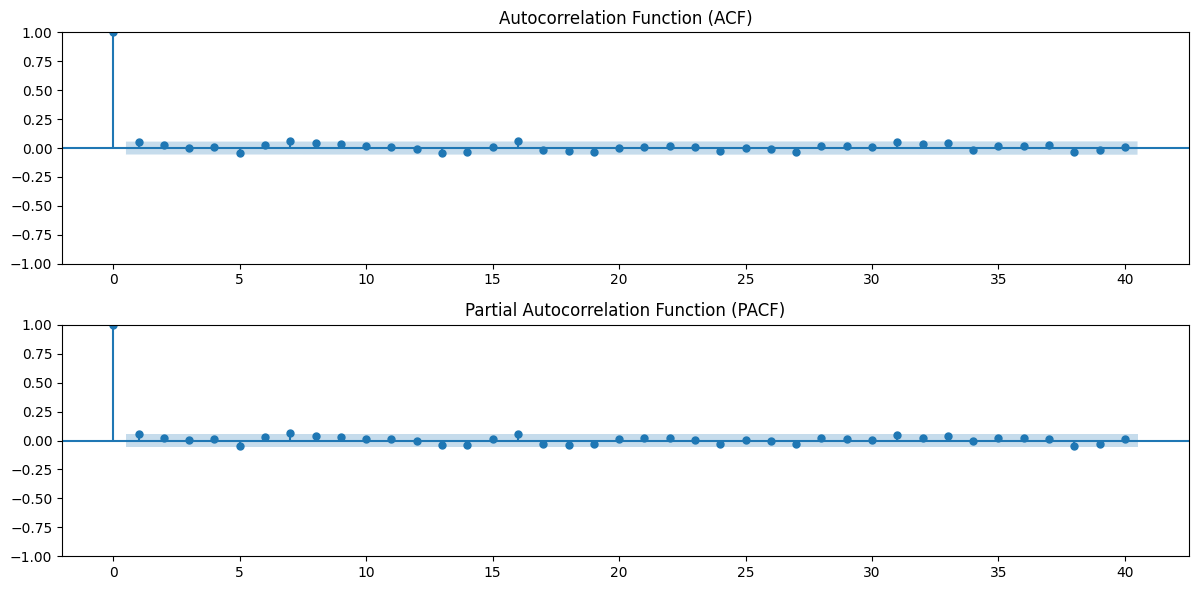

In [ ]:
# Assuming 'Average Sales' is the column with your time series data
series = data['Average Sales']

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(series, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(212)
plot_pacf(series, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
best_aic = float('inf')
best_order = None

# Iterate over potential values of p and q
for p in range(5):  # Try more values as needed
    for q in range(5):
        try:
            model = ARIMA(y, order=(p, 0, q))
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, q)
        except Exception as e:
            continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/st

Best ARIMA order: (1, 0) with AIC: 17408.051735160574


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
best_p, best_q = best_order
final_model = ARIMA(y, order=(best_p, 0, best_q))
final_results = final_model.fit()
print(final_results.summary())


                               SARIMAX Results                                
Dep. Variable:          Average Sales   No. Observations:                 1237
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8701.026
Date:                Tue, 30 Jul 2024   AIC                          17408.052
Time:                        16:38:45   BIC                          17423.413
Sample:                             0   HQIC                         17413.830
                               - 1237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.5322     12.659     17.816      0.000     200.722     250.343
ar.L1          0.0529      0.025      2.134      0.033       0.004       0.101
sigma2      7.538e+04   1018.019     74.042      0.0

In [ ]:
# Start and end points for predictions
start = len(train_df)
end = len(train_df) + len(test_df) - 1

# Forecast the test data
forecast = results.get_prediction(start=start, end=end, dynamic=False)
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()


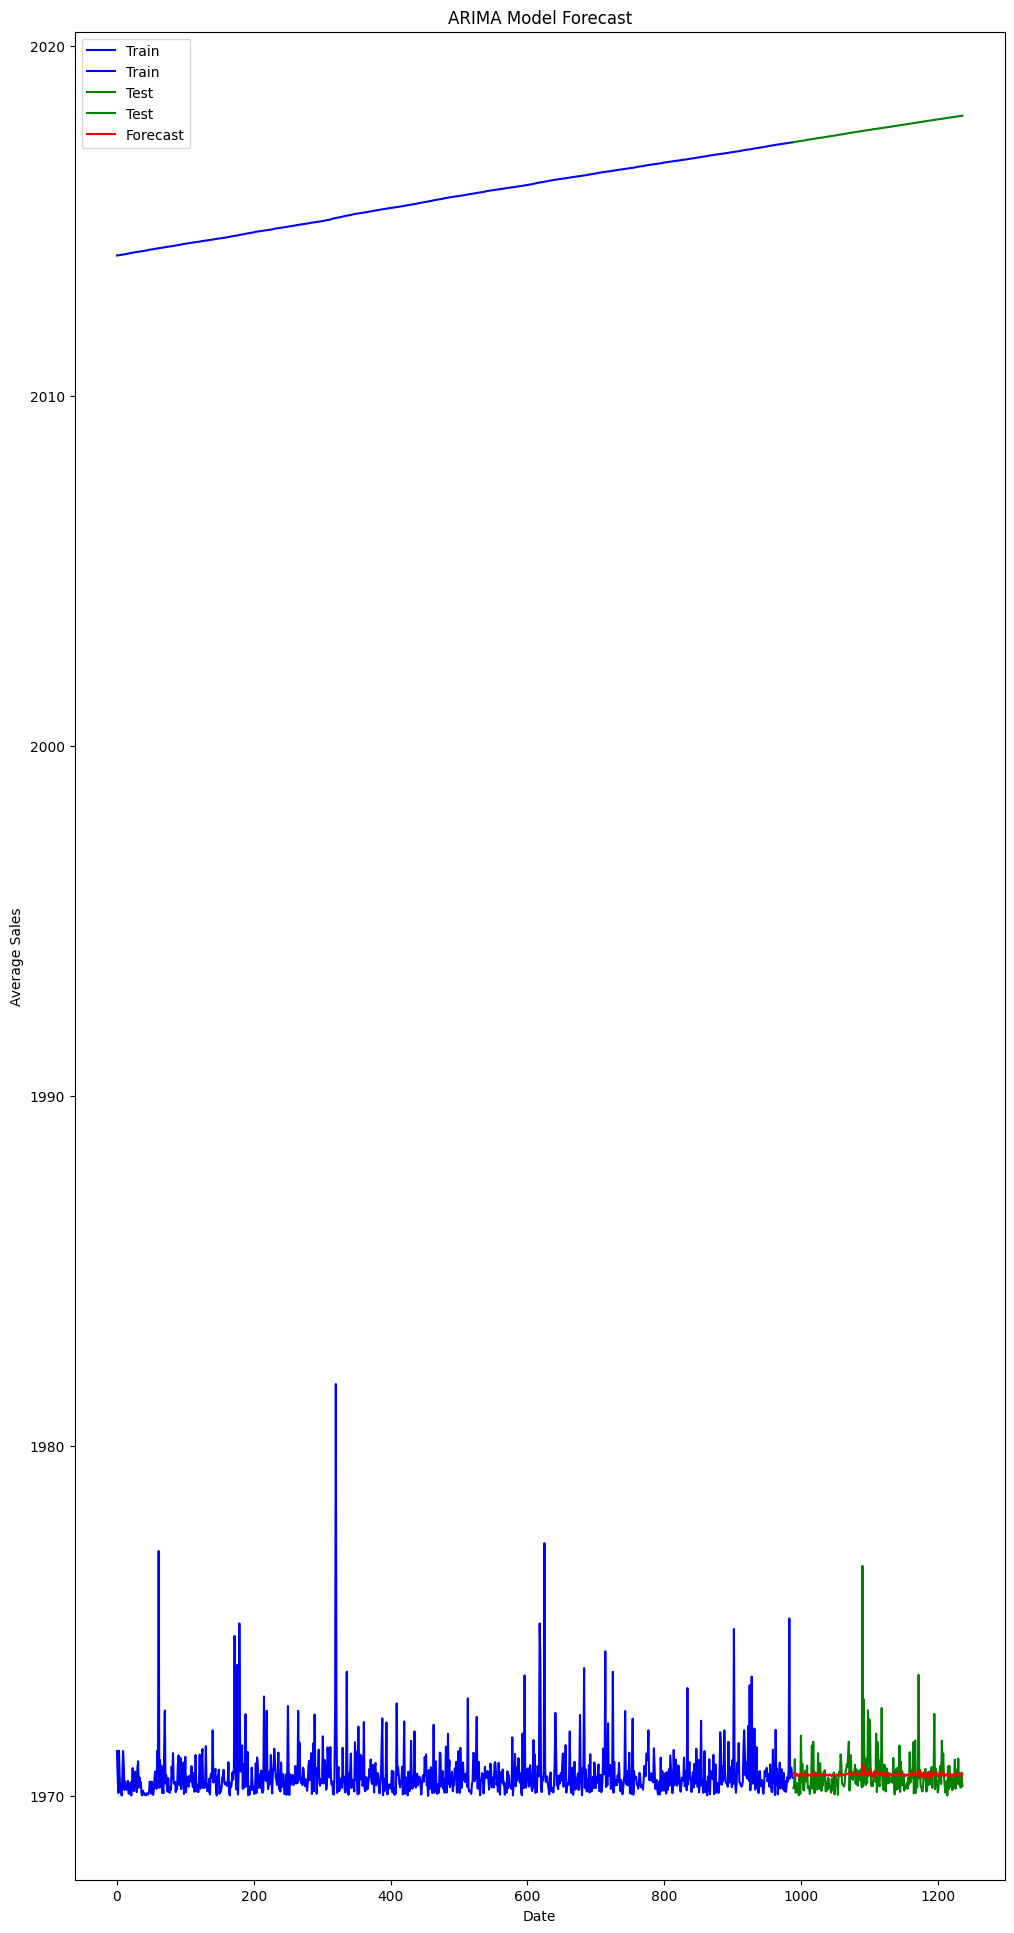

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 24))

# Plot training data
plt.plot(train_df.index, train_df, label='Train', color='blue')

# Plot test data
plt.plot(test_df.index, test_df, label='Test', color='green')

# Plot forecasted data
plt.plot(test_df.index, forecast_mean, label='Forecast', color='red')

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.show()


In [ ]:
# Forecast for the test data period
forecast = results.get_forecast(steps=len(test_df))
forecast_mean = forecast.predicted_mean


In [ ]:
# Check if there are NaN values in the forecasted sales
nan_count = forecast_mean.isnull().sum()
print(f"Number of NaN values in forecasted sales: {nan_count}")

if nan_count > 0:
    print("There are NaN values in the forecasted sales. Please recheck the model fitting and forecasting steps.")


Number of NaN values in forecasted sales: 0


In [ ]:
# Display forecasted average sales values
print("Forecasted Average Sales:")
print(forecast_mean)


Forecasted Average Sales:
1237    233.341010
1238    227.524146
1239    214.449306
1240    215.221133
1241    229.545132
           ...    
1480    225.449470
1481    225.572216
1482    225.524820
1483    225.605285
1484    225.471474
Name: predicted_mean, Length: 248, dtype: float64


In [ ]:
forecast_mean.head()

1237    233.341010
1238    227.524146
1239    214.449306
1240    215.221133
1241    229.545132
Name: predicted_mean, dtype: float64

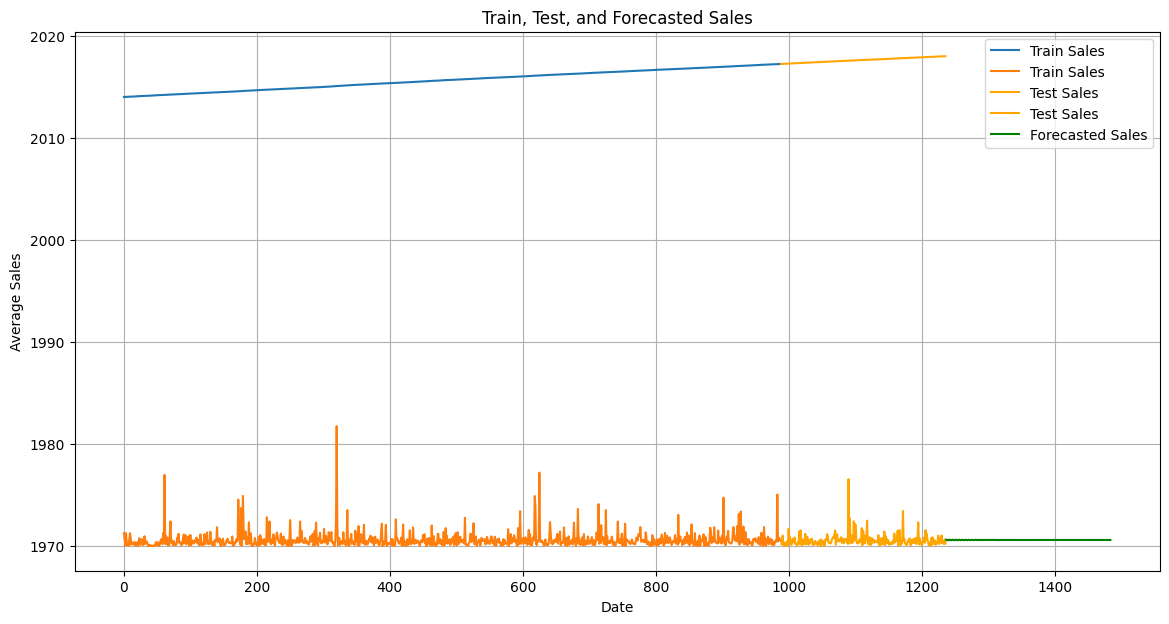

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(train_df.index, train_df, label='Train Sales')
plt.plot(test_df.index, test_df, label='Test Sales', color='orange')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Train, Test, and Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract the actual and forecasted sales values, excluding any date or index information
actual_sales = test_df['Average Sales'].values
forecasted_sales = forecast_mean.values

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(actual_sales, forecasted_sales))

print(f'Root Mean Square Error (RMSE): {rmse}')


Root Mean Square Error (RMSE): 226.57989995459297
